In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', name=["label", "message"],encoding = "ISO-8859-1")
print(df.head())

                                                            label message
v1   v2                                                 NaN   NaN     NaN
ham  Go until jurong point, crazy.. Available only i... NaN   NaN     NaN
     Ok lar... Joking wif u oni...                      NaN   NaN     NaN
spam Free entry in 2 a wkly comp to win FA Cup final... NaN   NaN     NaN
ham  U dun say so early hor... U c already then say...  NaN   NaN     NaN


In [20]:
df.rename(columns = {'v1':'Label','v2':'Message'}, inplace = True)
print(df.head())

  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [23]:
print(df.groupby('Label').describe())
print(df.groupby('Label').count())

      Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4
       Message
Label         
ham       4825
spam       747


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Word cloud for ham messages


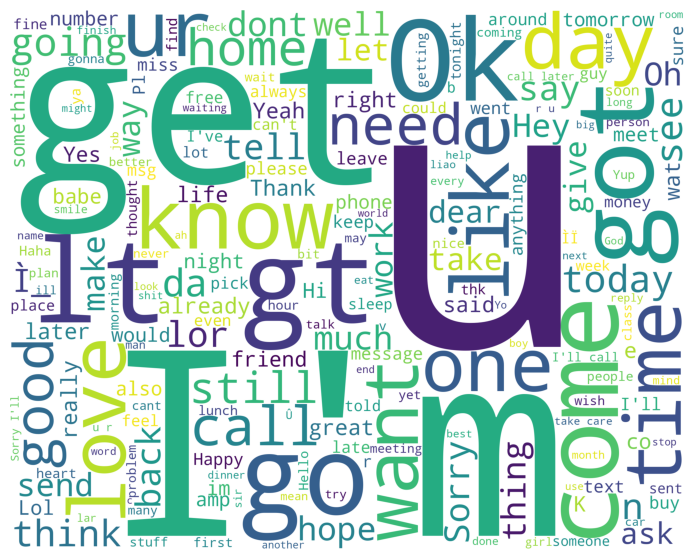

Word cloud for spam messages


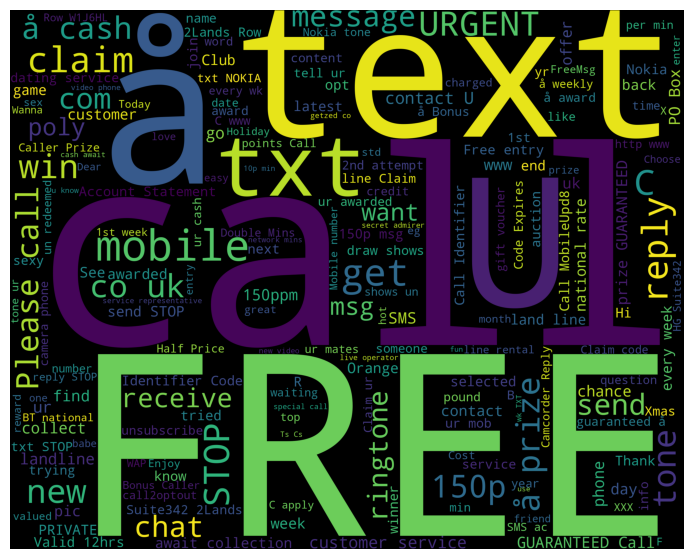

In [24]:
nltk.download('stopwords')
stop=stopwords.words('english')

from wordcloud import WordCloud
hamdata = df[ df['Label'] == 'ham']['Message']
spamdata = df[df['Label'] == 'spam']['Message']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Word cloud for ham messages")
wordcloud_draw(hamdata,'white')
print("Word cloud for spam messages")
wordcloud_draw(spamdata)

In [26]:
#data cleaning
ps = PorterStemmer() 
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Message'][i])  #removing special spl char words and numerics
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]   
    review = ' '.join(review)
    corpus.append(review)
print(corpus[:2])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni']


In [29]:
cv = CountVectorizer(max_features=2500)
cv.fit(corpus)
cv_tr = cv.transform(corpus)
print(cv_tr.shape)

(5572, 2500)
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


NameError: name 'X' is not defined

In [33]:
X = cv_tr.toarray()
print(X[0])
print(corpus[0]) # Original message
print(cv.inverse_transform([X[0]])) # Inverse Transformed message

[0 0 0 ... 0 0 0]
go jurong point crazi avail bugi n great world la e buffet cine got amor wat
[array(['avail', 'bugi', 'cine', 'crazi', 'go', 'got', 'great', 'la',
       'point', 'wat', 'world'], dtype='<U19')]
      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]


In [35]:
Y=pd.get_dummies(df['Label'])
print(Y)
Y=Y.iloc[:,1].values
print(Y)

      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]
[0 0 1 ... 0 0 0]


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [37]:
Model = MultinomialNB().fit(X_train, Y_train)

Y_pred=Model.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [39]:
conf_matr = confusion_matrix(Y_test,Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)

In [41]:
print(conf_matr)
print(accuracy*100)

[[943   6]
 [  9 157]]
98.65470852017937
